# PHP 2020

## 4. Object-Oriented Programming

### 4.2 Exercise

Implement the below class diagram.

In [1]:
import iplantuml;

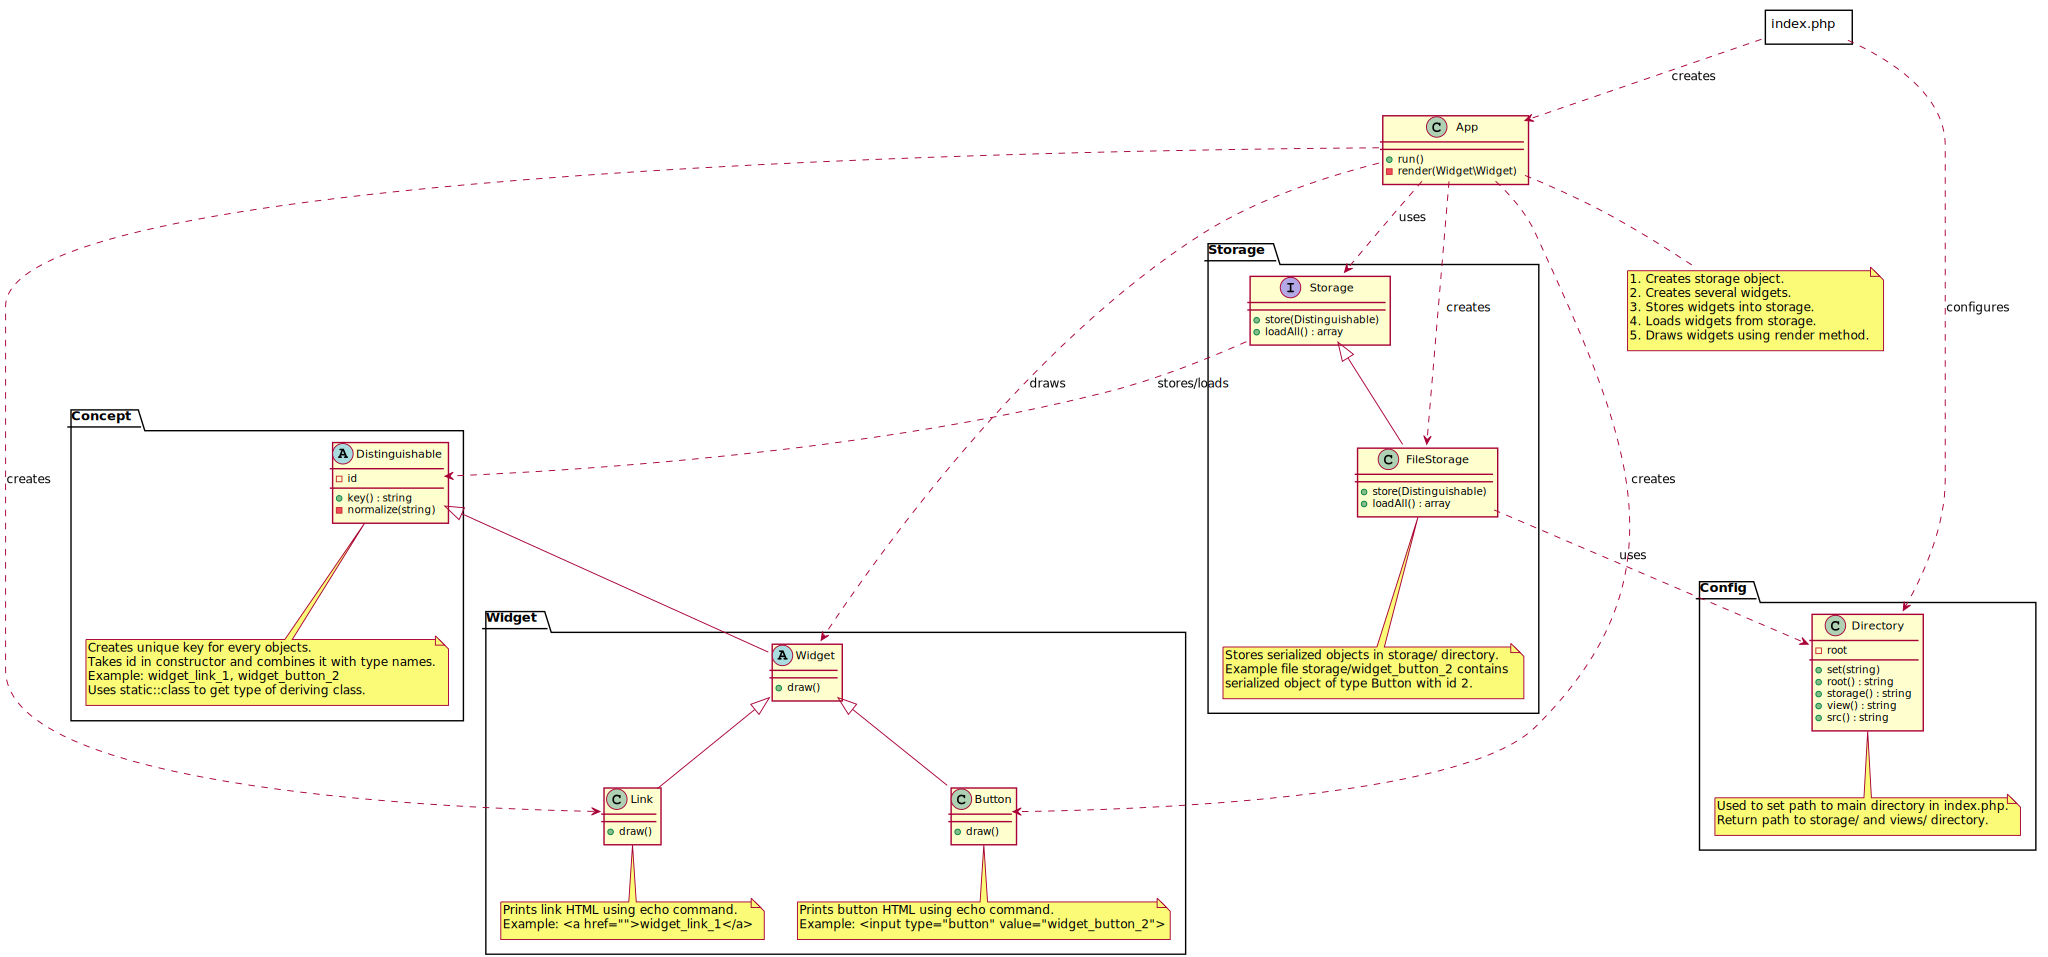

In [2]:
%%plantuml

@startuml

class App {
    + run()
    - render(Widget\Widget)
}

note as AppNote
1. Creates storage object.
2. Creates several widgets.
3. Stores widgets into storage.
4. Loads widgets from storage.
5. Draws widgets using render method.
end note

App .. AppNote

namespace Widget {

    abstract class Widget {
        + draw()
    }

    class Link {
        + draw()
    }

    note as LinkNote
    Prints link HTML using echo command.
    Example: <a href="">widget_link_1</a>
    end note

    Link .. LinkNote

    class Button {
        + draw()
    }

    note as ButtonNote
    Prints button HTML using echo command.
    Example: <input type="button" value="widget_button_2">
    end note

    Button .. ButtonNote

    Widget <|-- Link
    Widget <|-- Button
}

App ..> Widget.Widget : draws
App ..> Widget.Button : creates
App ..> Widget.Link : creates

namespace Concept {

    abstract class Distinguishable {
        - id
        + key() : string
        - normalize(string)
    }

    note as DistinguishableNote
    Creates unique key for every objects.
    Takes id in constructor and combines it with type names.
    Example: widget_link_1, widget_button_2
    Uses static::class to get type of deriving class.
    end note

    Distinguishable .. DistinguishableNote
}

Concept.Distinguishable <|-- Widget.Widget

namespace Config {

    class Directory {
        - {static} root
        + {static} set(string)
        + {static} root() : string
        + {static} storage() : string
        + {static} view() : string
        + {static} src() : string
    }

    note as DirectoryNote
    Used to set path to main directory in index.php.
    Return path to storage/ and views/ directory.
    end note

    Directory .. DirectoryNote
}

namespace Storage {

    interface Storage {
        + store(Distinguishable)
        + loadAll() : array
    }

    class FileStorage {
        + store(Distinguishable)
        + loadAll() : array
    }

    note as FileStorageNote
    Stores serialized objects in storage/ directory.
    Example file storage/widget_button_2 contains
    serialized object of type Button with id 2.
    end note

    FileStorage .. FileStorageNote

    Storage <|-- FileStorage
}

Storage.Storage ..> Concept.Distinguishable : stores/loads
Storage.FileStorage ..> Config.Directory : uses

App ..> Storage.FileStorage : creates
App ..> Storage.Storage : uses

package index.php <<Rectangle>> {
}

index.php ..> App : creates
index.php ..> Config.Directory : configures

@enduml

In [ ]:
! phpstorm project

OpenJDK 64-Bit Server VM warning: Option UseConcMarkSweepGC was deprecated in version 9.0 and will likely be removed in a future release.
2020-11-04 21:27:17,792 [  22420]   WARN - Container.ComponentManagerImpl - Do not use constructor injection (requestorClass=org.jetbrains.plugins.phpstorm.PhpStormInitialConfigurator) 
2020-11-04 21:27:24,799 [  29427]   WARN - .diagnostic.PerformanceWatcher - UI was frozen for 5244ms, details saved to /home/student/.cache/JetBrains/PhpStorm2020.2/log/threadDumps-freeze-20201104-212724-PS-202.6948.87-System.identityHashCode-5sec 
2020-11-04 21:27:47,707 [  52335]   WARN - pl.local.NativeFileWatcherImpl - Watcher terminated with exit code 3 
2020-11-04 21:27:48,072 [  52700]   WARN - pl.local.NativeFileWatcherImpl - Watcher terminated with exit code 3 
2020-11-04 21:27:48,451 [  53079]   WARN - pl.local.NativeFileWatcherImpl - Watcher terminated with exit code 3 
2020-11-04 21:27:48,778 [  53406]   WARN - pl.local.NativeFileWatcherImpl - Watcher term

You can test your solution using included tests:

In [4]:
import subprocess
phpServer = subprocess.Popen(['php', '-S', 'localhost:8888', '-t', 'project/public'])

In [5]:
! cd tests && composer install && vendor/bin/codecept run

Loading composer repositories with package information
Installing dependencies (including require-dev) from lock file
Nothing to install or update
Generating autoload files
44 packages you are using are looking for funding.
Use the `composer fund` command to find out more!
Codeception PHP Testing Framework v4.1.7
Powered by PHPUnit 9.3.11 by Sebastian Bergmann and contributors.
Running with seed: 


Acceptance Tests (1) -----------------------------------------------------------
✔ ObjectOrientedCept:  (0.10s)
--------------------------------------------------------------------------------


Time: 00:00.287, Memory: 12.00 MB

OK (1 test, 31 assertions)


In [6]:
phpServer.kill()